<a href="https://colab.research.google.com/github/Mariyaben/Vector-based-Retreival-Methods-and-Re-ranking/blob/main/Vector_based_retrieval_methods_all_banks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BARCLAYS**

# TF-IDF (Term Frequency-Inverse Document Frequency)
Retrieval method ranks documents based on the relevance of terms within a query. It calculates a numerical value for each term in the document, weighing the frequency of occurrence (TF) against how commonly the term appears across all documents (IDF). Documents are ranked by the TF-IDF score, prioritizing those that contain rare terms specific to the query, thereby emphasizing content relevance in information retrieval tasks.

In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 56.4 MB/s eta 0:00:00


In [3]:
!pip install pdfplumber scikit-learn openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [5]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['Barclays PLC Pillar 3 Report.pdf', 'Barclays-Bank-PLC-Pillar-3-Report-HY24.pdf', 'Barclays PLC Pillar 3 Report.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Sample query
query = "credit risk weighted assets"
query_vec = vectorizer.transform([query])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
for idx in ranked_doc_indices:
    print(f"Document {idx+1} (Similarity: {cosine_similarities[idx]}):\n{documents[idx][:500]}...\n")

Document 2 (Similarity: 0.30780655184390276):
Barclays Bank PLC Interim Pillar 3 Report
30 June 2024Table of contents
Barclays Bank PLC Pillar 3 Page
Forward-looking statements 2
Introduction
Disclosure Background 3
KM1 - Key Metrics 4
Capital
CC1 - Composition of regulatory own funds 5
CC2 - Reconciliation of regulatory own funds to balance sheet in the audited financial statements 8
IFRS 9 - Comparison of institution’s own funds and capital and leverage ratios with and without the IFRS9 transitional arrangements 9
Risk weighted assets (RW...

Document 3 (Similarity: 0.28774835640994023):
Barclays PLC
Q1 2024 Pillar 3 Report
31 March 2024Table of Contents
Barclays PLC Pillar 3 Page
Notes
Forward-looking statements 3
Introduction
Disclosure Background 4
Summary
KM1 – Key Metrics 5
Capital
IFRS 9 - Comparison of institutions’ own funds and capital and leverage ratios with and without the application of 7
transitional arrangements for IFRS 9 or analogous ECLs
Risk weighted assets (RWAs)


In [6]:
import matplotlib.pyplot as plt


In [7]:
!pip install llama_index.llms.gradient

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.7/410.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


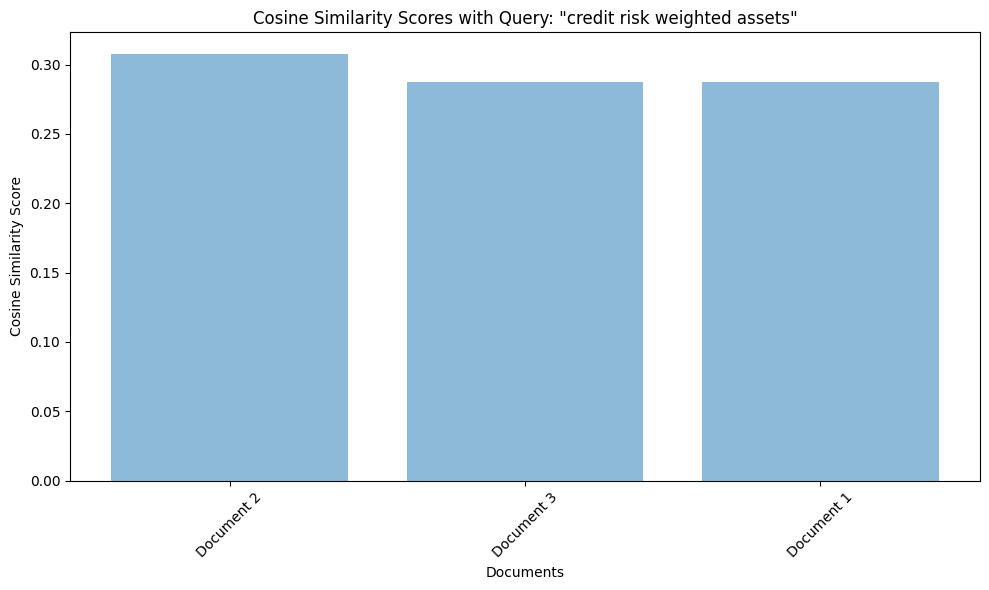

In [ ]:
# Output the ranking of documents and plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_doc_indices)), cosine_similarities[ranked_doc_indices], align='center', alpha=0.5)
plt.xticks(range(len(ranked_doc_indices)), [f"Document {idx+1}" for idx in ranked_doc_indices], rotation=45)
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores with Query: "credit risk weighted assets"')
plt.tight_layout()
plt.show()

#Latent Semantic Indexing
LSI for text retrieval involves first constructing a term-document matrix from a corpus of documents, followed by applying singular value decomposition (SVD) to reduce the dimensionality of this matrix. This reduction captures latent semantic relationships among terms and documents, allowing for improved retrieval by considering semantic similarity rather than just exact term matches. Querying in LSI retrieves documents based on their relevance in the reduced semantic space, enhancing the accuracy of information retrieval systems.

In [8]:
!pip install scikit-learn


Document 2 (Similarity: 0.999995837935736):
Barclays Bank PLC Interim Pillar 3 Report
30 June 2024Table of contents
Barclays Bank PLC Pillar 3 Page
Forward-looking statements 2
Introduction
Disclosure Background 3
KM1 - Key Metrics 4
Capital
CC1 - Composition of regulatory own funds 5
CC2 - Reconciliation of regulatory own funds to balance sheet in the audited financial statements 8
IFRS 9 - Comparison of institution’s own funds and capital and leverage ratios with and without the IFRS9 transitional arrangements 9
Risk weighted assets (RW...

Document 1 (Similarity: 0.9958684090549308):
Barclays Bank PLC 01
Introduction Risk and capital position review Barclays’ approach to managing risks Appendices Pillar 3 Report 2023
Contents
Introduction
Notes on Basis of Preparation and Forward-looking statements 02
Risk and capital position review
Analysis of treasury and capital risk 05
Analysis of credit risk 23
Barclays’ approach to managing risks
Management of credit risk mitigation technique

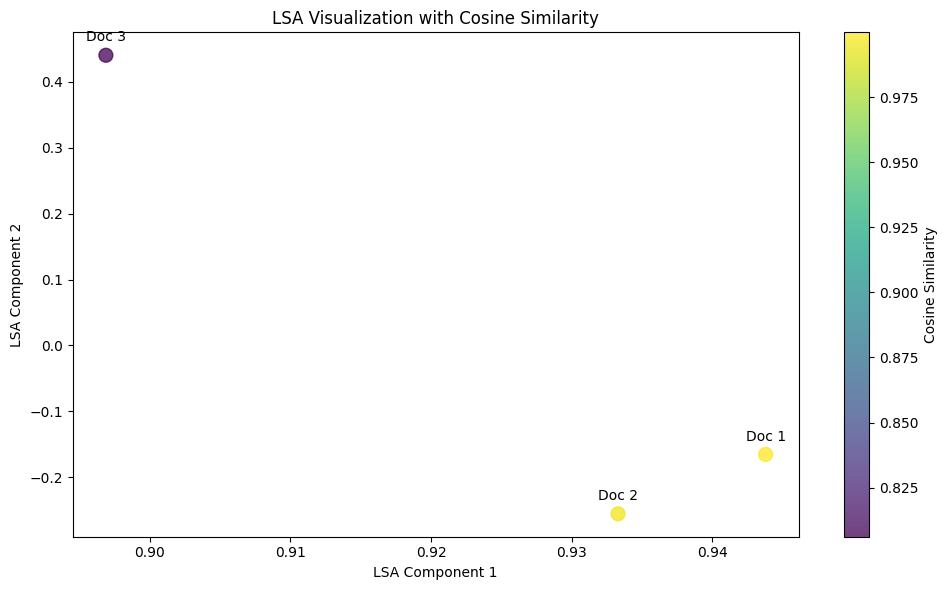

In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Extract text from PDFs
pdf_paths = ['BB-PLC-Pillar-3-Report-2023.pdf', 'Barclays-Bank-PLC-Pillar-3-Report-HY24.pdf', 'Barclays PLC Pillar 3 Report.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "credit risk weighted assets"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity between the query and the documents
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings based on cosine similarity
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx + 1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]

# Print ranked documents with similarity scores
for doc_id, similarity, doc_preview in ranked_documents:
    print(f"Document {doc_id} (Similarity: {similarity}):\n{doc_preview}...\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cosine_similarities, cmap='viridis', s=100, alpha=0.75)
plt.colorbar(label='Cosine Similarity')
plt.title('LSA Visualization with Cosine Similarity')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')

# Annotate documents
for i, txt in enumerate(ranked_doc_indices):
    plt.annotate(f"Doc {txt+1}", (lsa_matrix[i, 0], lsa_matrix[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


#Text Retrieval using SentenceTransformer model
This code leverages Pinecone for efficient vector indexing and retrieval of embeddings generated by a SentenceTransformer model from paragraphs extracted from PDF documents. It demonstrates an end-to-end workflow from index creation to querying for relevant information based on textual embeddings.

In [9]:
!pip install pinecone sentence_transformers pinecone-client


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import os
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import pdfplumber

# Initialize Pinecone
pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "barclays-reports"

# Check if index exists, and create it if not
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

# Load pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to extract text from PDFs
def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Paths to PDF files
pdf_files = ['BB-PLC-Pillar-3-Report-2023.pdf', 'Barclays-Bank-PLC-Pillar-3-Report-HY24.pdf', 'Barclays PLC Pillar 3 Report.pdf']

# Extract text and upsert embeddings into Pinecone index
for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')  # Split text into paragraphs
    embeddings = model.encode(paragraphs)  # Encode paragraphs into embeddings

    # Upsert paragraph embeddings into the Pinecone index
    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'  # Unique ID for each paragraph
        index.upsert([(doc_id, embedding.tolist())])  # Upsert embedding

# Function to query Pinecone index
def query_index(query, top_k=10):
    query_embedding = model.encode([query])  # Encode query into embedding
    result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)  # Query Pinecone
    return result

# Query the index with a specific query
query_result = query_index("credit risk weighted assets")
print(query_result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'matches': [{'id': 'doc_1_para_0', 'score': 0.566913962, 'values': []},
             {'id': 'doc_2_para_0', 'score': 0.470575929, 'values': []},
             {'id': 'doc_0_para_0', 'score': 0.401050091, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


# **NATWEST**

# TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['/content/nwg-h1-results.pdf', '/content/nwg-pillar3-report.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Sample query
query = "Capital adequacy"
query_vec = vectorizer.transform([query])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
for idx in ranked_doc_indices:
    print(f"Document {idx+1} (Similarity: {cosine_similarities[idx]}):\n{documents[idx][:500]}...\n")


Document 1 (Similarity: 0.12165946888508009):
NatWest Group plc
Interim Results 2024
natwestgroup.comNatWest Group Business performance Risk and capital Financial Additional
2024 Interim Results summary management statements information 1
Inside this report
Business performance summary Risk and capital management continued Financial statements and notes continued
2 H1 2024 performance summary Stage 2 decomposition by a significant 97 Trading assets and liabilities
51 increase in credit risk trigger
4 Performance key metrics and ratios 98 Lo...

Document 2 (Similarity: 0.06822605415669114):
NatWest Group plc
H1 2024 Pillar 3
natwestgroup.comContents Page
Forward-looking statements 4
Presentation of information 5
Annex I: Key metrics and overview of risk-weighted assets
NatWest Group plc – Key points 6
UK KM1: Key metrics 7
UK KM2: Key metrics – MREL 8
IFRS 9-FL: Comparison of institutions’ own funds and capital and leverage ratios with and without the
application of transitional arrange

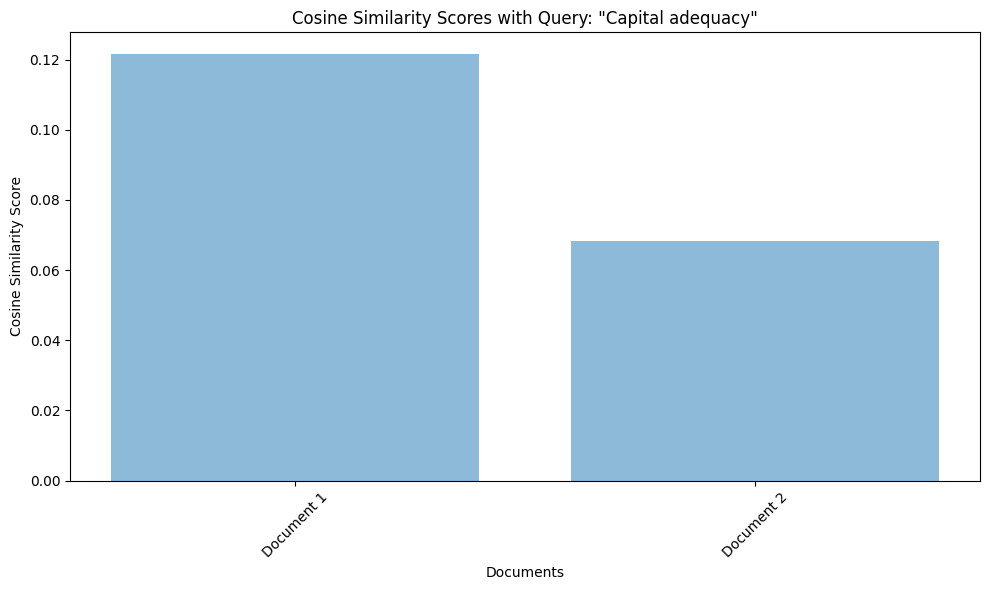

In [ ]:
# Output the ranking of documents and plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_doc_indices)), cosine_similarities[ranked_doc_indices], align='center', alpha=0.5)
plt.xticks(range(len(ranked_doc_indices)), [f"Document {idx+1}" for idx in ranked_doc_indices], rotation=45)
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores with Query: "Capital adequacy"')
plt.tight_layout()
plt.show()

#Latent Semantic Indexing


Document 1 (Similarity: 0.9999030327046738):
NatWest Group plc
Interim Results 2024
natwestgroup.comNatWest Group Business performance Risk and capital Financial Additional
2024 Interim Results summary management statements information 1
Inside this report
Business performance summary Risk and capital management continued Financial statements and notes continued
2 H1 2024 performance summary Stage 2 decomposition by a significant 97 Trading assets and liabilities
51 increase in credit risk trigger
4 Performance key metrics and ratios 98 Lo...

Document 2 (Similarity: 0.560740886722011):
NatWest Group plc
H1 2024 Pillar 3
natwestgroup.comContents Page
Forward-looking statements 4
Presentation of information 5
Annex I: Key metrics and overview of risk-weighted assets
NatWest Group plc – Key points 6
UK KM1: Key metrics 7
UK KM2: Key metrics – MREL 8
IFRS 9-FL: Comparison of institutions’ own funds and capital and leverage ratios with and without the
application of transitional arrangemen

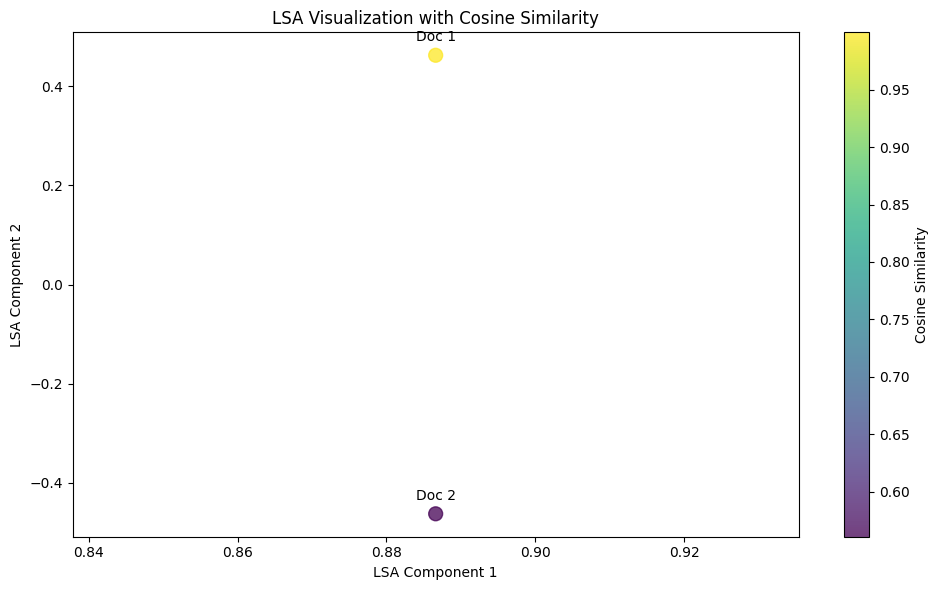

In [ ]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Extract text from PDFs
pdf_paths = ['/content/nwg-h1-results.pdf', '/content/nwg-pillar3-report.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "Capital adequacy"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity between the query and the documents
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings based on cosine similarity
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx + 1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]

# Print ranked documents with similarity scores
for doc_id, similarity, doc_preview in ranked_documents:
    print(f"Document {doc_id} (Similarity: {similarity}):\n{doc_preview}...\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cosine_similarities, cmap='viridis', s=100, alpha=0.75)
plt.colorbar(label='Cosine Similarity')
plt.title('LSA Visualization with Cosine Similarity')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')

# Annotate documents
for i, txt in enumerate(ranked_doc_indices):
    plt.annotate(f"Doc {txt+1}", (lsa_matrix[i, 0], lsa_matrix[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


#Text Retrieval using SentenceTransformer model


In [ ]:
import os
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import pdfplumber

# Initialize Pinecone
pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "natwest-reports"

# Check if index exists, and create it if not
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

# Load pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to extract text from PDFs
def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Paths to PDF files
pdf_files = ['/content/nwg-h1-results.pdf', '/content/nwg-pillar3-report.pdf']

# Extract text and upsert embeddings into Pinecone index
for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')  # Split text into paragraphs
    embeddings = model.encode(paragraphs)  # Encode paragraphs into embeddings

    # Upsert paragraph embeddings into the Pinecone index
    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'  # Unique ID for each paragraph
        index.upsert([(doc_id, embedding.tolist())])  # Upsert embedding

# Function to query Pinecone index
def query_index(query, top_k=10):
    query_embedding = model.encode([query])  # Encode query into embedding
    result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)  # Query Pinecone
    return result

# Query the index with a specific query
query_result = query_index("Capital adequacy")
print(query_result)


{'matches': [{'id': 'doc_1_para_0', 'score': 0.24739711, 'values': []},
             {'id': 'doc_0_para_0', 'score': 0.148518503, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


# **LLYODS**

# TF-IDF (Term Frequency-Inverse Document Frequency)

In [10]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['2024-lbg-q1-pillar-3.pdf', '2024-lbg-hy-pillar-3.pdf', '/content/2023-lbg-fy-pillar-3.pdf', '/content/2024-lbg-hy-results.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Sample query
query = "Market risk"
query_vec = vectorizer.transform([query])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
for idx in ranked_doc_indices:
    print(f"Document {idx+1} (Similarity: {cosine_similarities[idx]}):\n{documents[idx][:500]}...\n")


Document 3 (Similarity: 0.30559381082998865):
Lloyds Banking Group plc
2023 Year-End
Pillar 3 Disclosures
31 December 2023LLOYDS BANKING GROUP 2023 YEAR-END PILLAR 3 DISCLOSURES
Table of contents
Key metric and overview of risk weighted exposure amounts
Attestation Summary 4
Executive summary 5
Introduction 6
Disclosure policy 7
KM1 Key metrics 8
IFRS 9-FL Capital - IFRS 9 - FL 9
KM2 Key metrics - TLAC Requirements 9
OV1 Overview of risk-weighted exposure amounts 10
Scope of consolidation 11
Differences between accounting and regulatory sco...

Document 1 (Similarity: 0.2387918209060117):
Lloyds Banking Group plc
Q1 2024
Pillar 3 Disclosures
24 April 2024LLOYDS BANKING GROUP Q1 2024 PILLAR 3 DISCLOSURES
Table of contents
Basis of preparation 2
Key metric and overview of risk weighted exposure amounts
KM1 Key metrics 3
IFRS 9-FL Capital - IFRS 9 - FL 4
KM2 Key metrics - TLAC Requirements 4
OV1 Overview of risk-weighted exposure amounts 5
Credit risk
CR8 Risk-weighted assets movements by

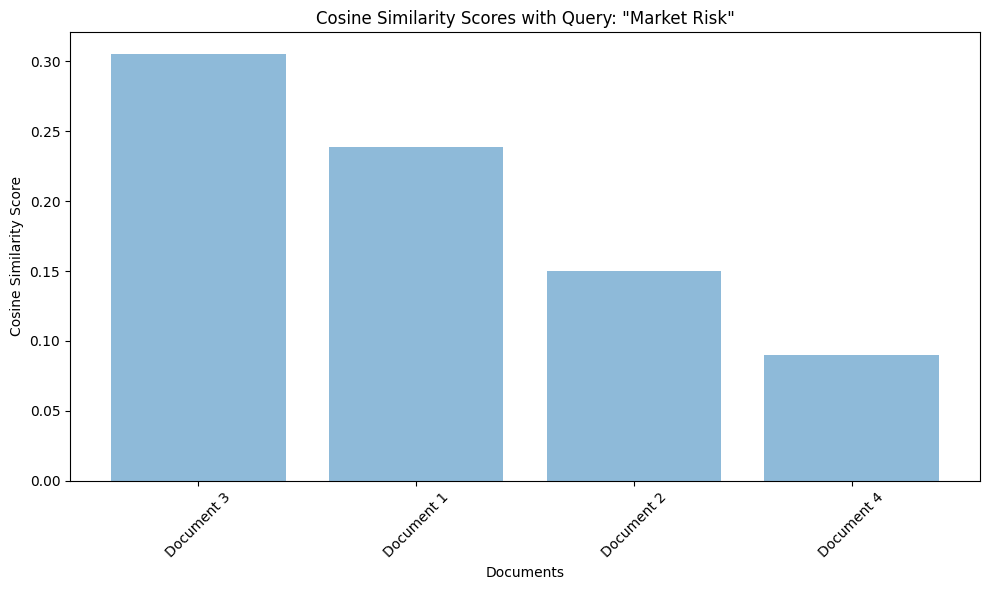

In [12]:
# Output the ranking of documents and plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_doc_indices)), cosine_similarities[ranked_doc_indices], align='center', alpha=0.5)
plt.xticks(range(len(ranked_doc_indices)), [f"Document {idx+1}" for idx in ranked_doc_indices], rotation=45)
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores with Query: "Market Risk"')
plt.tight_layout()
plt.show()

# Latent Semantic Indexing

Document 2 (Similarity: 0.9999984926269864):
Lloyds Banking Group plc
2024 Half-Year
Pillar 3 Disclosures
16
August 2024LLOYDS BANKING GROUP HY 2024 PILLAR 3 DISCLOSURES
Table of contents
Basis of preparation 3
Key metric and overview of risk weighted exposure amounts
KM1 Key metrics 4
IFRS 9-FL Capital - IFRS 9 - FL 5
KM2 Key metrics - TLAC Requirements 5
OV1 Overview of risk-weighted exposure amounts 7
CR8 Risk-weighted assets movements by key driver 8
MR2-B RWA flow statements of market risk exposures under an Internal Model Approach 9
...

Document 3 (Similarity: 0.9886429815768292):
Lloyds Banking Group plc
2023 Year-End
Pillar 3 Disclosures
31 December 2023LLOYDS BANKING GROUP 2023 YEAR-END PILLAR 3 DISCLOSURES
Table of contents
Key metric and overview of risk weighted exposure amounts
Attestation Summary 4
Executive summary 5
Introduction 6
Disclosure policy 7
KM1 Key metrics 8
IFRS 9-FL Capital - IFRS 9 - FL 9
KM2 Key metrics - TLAC Requirements 9
OV1 Overview of risk-weighted 

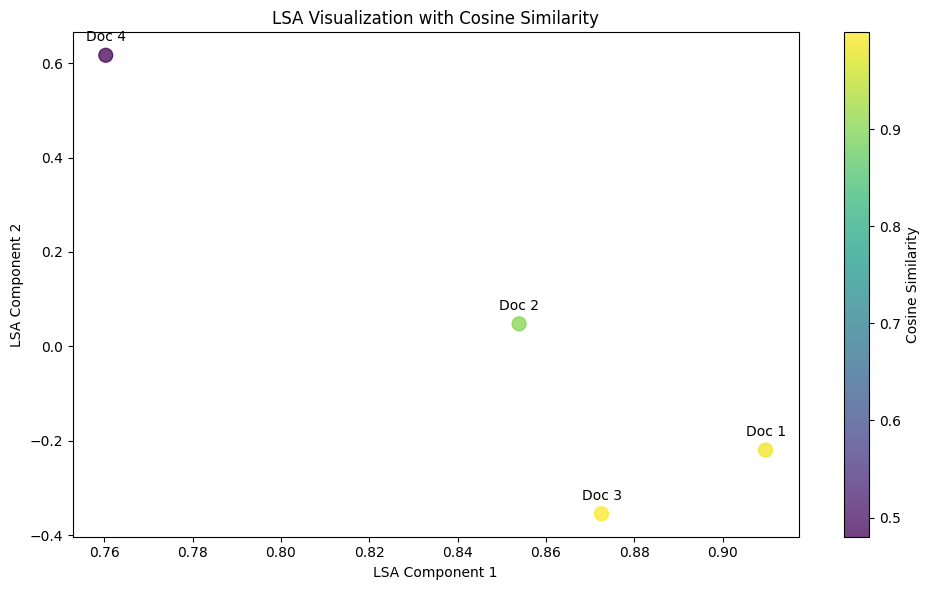

In [13]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Extract text from PDFs
pdf_paths = ['2024-lbg-q1-pillar-3.pdf', '2024-lbg-hy-pillar-3.pdf', '/content/2023-lbg-fy-pillar-3.pdf', '/content/2024-lbg-hy-results.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "Market risk"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity between the query and the documents
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings based on cosine similarity
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx + 1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]

# Print ranked documents with similarity scores
for doc_id, similarity, doc_preview in ranked_documents:
    print(f"Document {doc_id} (Similarity: {similarity}):\n{doc_preview}...\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cosine_similarities, cmap='viridis', s=100, alpha=0.75)
plt.colorbar(label='Cosine Similarity')
plt.title('LSA Visualization with Cosine Similarity')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')

# Annotate documents
for i, txt in enumerate(ranked_doc_indices):
    plt.annotate(f"Doc {txt+1}", (lsa_matrix[i, 0], lsa_matrix[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# Text Retrieval using SentenceTransformer model

In [17]:
import os
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import pdfplumber

# Initialize Pinecone
pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "barclays-reports"

# Check if index exists, and create it if not
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

# Load pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to extract text from PDFs
def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Paths to PDF files
pdf_files = ['2024-lbg-q1-pillar-3.pdf', '2024-lbg-hy-pillar-3.pdf', '/content/2023-lbg-fy-pillar-3.pdf', '/content/2024-lbg-hy-results.pdf']

# Extract text and upsert embeddings into Pinecone index
for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')  # Split text into paragraphs
    embeddings = model.encode(paragraphs)  # Encode paragraphs into embeddings

    # Upsert paragraph embeddings into the Pinecone index
    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'  # Unique ID for each paragraph
        index.upsert([(doc_id, embedding.tolist())])  # Upsert embedding

# Function to query Pinecone index
def query_index(query, top_k=10):
    query_embedding = model.encode([query])  # Encode query into embedding
    result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)  # Query Pinecone
    return result

# Query the index with a specific query
query_result = query_index("Market risk")
print(query_result)


{'matches': [{'id': 'doc_2_para_10', 'score': 0.453687727, 'values': []},
             {'id': 'doc_1_para_13', 'score': 0.444461495, 'values': []},
             {'id': 'doc_0_para_13', 'score': 0.437933475, 'values': []},
             {'id': 'doc_1_para_10', 'score': 0.414251298, 'values': []},
             {'id': 'doc_0_para_18', 'score': 0.409833312, 'values': []},
             {'id': 'doc_1_para_24', 'score': 0.405129761, 'values': []},
             {'id': 'doc_0_para_45', 'score': 0.405116647, 'values': []},
             {'id': 'doc_0_para_42', 'score': 0.403832793, 'values': []},
             {'id': 'doc_0_para_26', 'score': 0.387593, 'values': []},
             {'id': 'doc_1_para_0', 'score': 0.315392435, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}


# **HSBC**

# TF-IDF (Term Frequency-Inverse Document Frequency)

In [19]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Extract text from PDFs
pdf_paths = ['/content/240508-hsbc-holdings-plc-pillar-3-disclosures-at-31-march-2024-english.pdf', '/content/240807-pillar-3-disclosures-at-30-june-2024.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Sample query
query = "Liquidity coverage ratio (LCR)"
query_vec = vectorizer.transform([query])

# Calculate cosine similarity
cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

# Get document rankings
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
for idx in ranked_doc_indices:
    print(f"Document {idx+1} (Similarity: {cosine_similarities[idx]}):\n{documents[idx][:500]}...\n")


Document 1 (Similarity: 0.15430920057325442):
HSBC Holdings p lc
Pillar 3 Disclosures at 31 20
March 24Pillar 3 Disclosures at 31 March 2024
Unless the context requires otherwise, ‘HSBC Holdings’ means HSBC
Contents Holdings plc and ‘HSBC’, the ‘Group’, ‘we’, ‘us’ and ‘our’ refer to
HSBC Holdings together with its subsidiaries. Within this document
the Hong Kong Special Administrative Region of the People’s
2 Introduction
Republic of China is referred to as ‘Hong Kong’. When used in the
3 Highlights
terms ‘shareholders’ equity’ and ‘total s...

Document 2 (Similarity: 0.052013882470315666):
HSBC Holdings plc
Pillar 3 Disclosures at 30 June 2024Pillar 3 Disclosures at 30 June 2024
31 23 Performing and non-performing exposures and related
Contents
provisions (CR1)
32 24 Maturity of exposures (CR1-A)
2 Introduction
33 25 Changes in the stock of non-performing loans and advances
2 Pillar 3 disclosures and governance (CR2)
2 Regulatory framework for disclosures 33 26 Credit quality of forbo

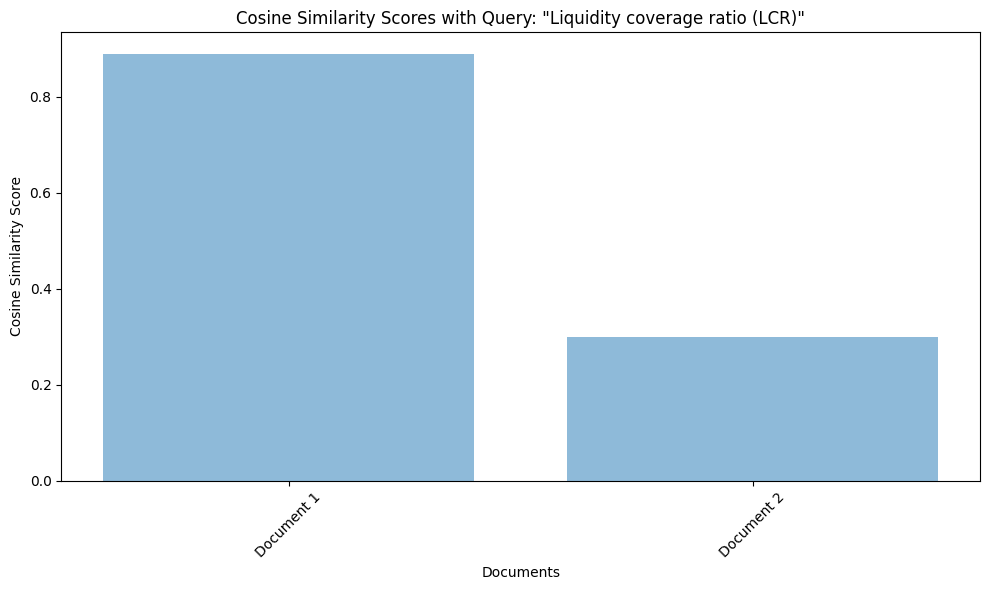

In [23]:
# Output the ranking of documents and plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(ranked_doc_indices)), cosine_similarities[ranked_doc_indices], align='center', alpha=0.5)
plt.xticks(range(len(ranked_doc_indices)), [f"Document {idx+1}" for idx in ranked_doc_indices], rotation=45)
plt.xlabel('Documents')
plt.ylabel('Cosine Similarity Score')
plt.title('Cosine Similarity Scores with Query: "Liquidity coverage ratio (LCR)"')
plt.tight_layout()
plt.show()

# Latent Semantic Indexing

Document 1 (Similarity: 0.8892600250087087):
HSBC Holdings p lc
Pillar 3 Disclosures at 31 20
March 24Pillar 3 Disclosures at 31 March 2024
Unless the context requires otherwise, ‘HSBC Holdings’ means HSBC
Contents Holdings plc and ‘HSBC’, the ‘Group’, ‘we’, ‘us’ and ‘our’ refer to
HSBC Holdings together with its subsidiaries. Within this document
the Hong Kong Special Administrative Region of the People’s
2 Introduction
Republic of China is referred to as ‘Hong Kong’. When used in the
3 Highlights
terms ‘shareholders’ equity’ and ‘total s...

Document 2 (Similarity: 0.2997479492766572):
HSBC Holdings plc
Pillar 3 Disclosures at 30 June 2024Pillar 3 Disclosures at 30 June 2024
31 23 Performing and non-performing exposures and related
Contents
provisions (CR1)
32 24 Maturity of exposures (CR1-A)
2 Introduction
33 25 Changes in the stock of non-performing loans and advances
2 Pillar 3 disclosures and governance (CR2)
2 Regulatory framework for disclosures 33 26 Credit quality of forborne

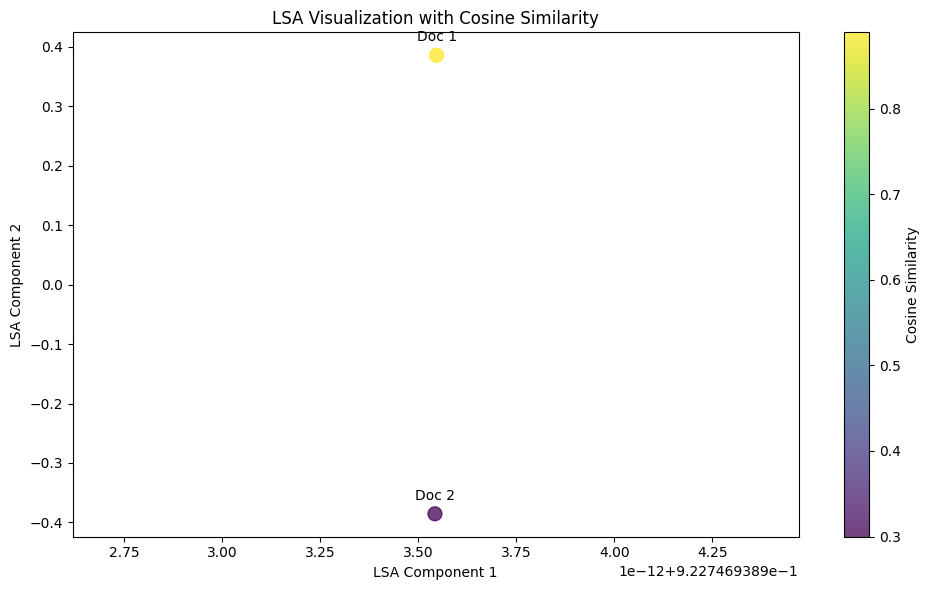

In [21]:
import pdfplumber
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Function to extract text from PDF using pdfplumber
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Extract text from PDFs
pdf_paths = ['/content/240508-hsbc-holdings-plc-pillar-3-disclosures-at-31-march-2024-english.pdf', '/content/240807-pillar-3-disclosures-at-30-june-2024.pdf']
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]

# Preprocess and compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Apply LSI (using TruncatedSVD)
n_components = 2  # Number of dimensions for LSI
lsa = TruncatedSVD(n_components=n_components)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# Sample query
query = "Liquidity coverage ratio (LCR)"
query_vec = vectorizer.transform([query])
query_lsa = lsa.transform(query_vec)

# Calculate cosine similarity between the query and the documents
cosine_similarities = cosine_similarity(query_lsa, lsa_matrix).flatten()

# Get document rankings based on cosine similarity
ranked_doc_indices = cosine_similarities.argsort()[::-1]

# Output the ranking of documents
ranked_documents = [(idx + 1, cosine_similarities[idx], documents[idx][:500]) for idx in ranked_doc_indices]

# Print ranked documents with similarity scores
for doc_id, similarity, doc_preview in ranked_documents:
    print(f"Document {doc_id} (Similarity: {similarity}):\n{doc_preview}...\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cosine_similarities, cmap='viridis', s=100, alpha=0.75)
plt.colorbar(label='Cosine Similarity')
plt.title('LSA Visualization with Cosine Similarity')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')

# Annotate documents
for i, txt in enumerate(ranked_doc_indices):
    plt.annotate(f"Doc {txt+1}", (lsa_matrix[i, 0], lsa_matrix[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()


# Text Retrieval using SentenceTransformer model

In [22]:
import os
from pinecone import Pinecone, ServerlessSpec
from sentence_transformers import SentenceTransformer
import pdfplumber

# Initialize Pinecone
pc = Pinecone(
    api_key='49d4cc5d-f136-4c4b-a624-cba32497bd6c'
)

index_name = "barclays-reports"

# Check if index exists, and create it if not
if index_name not in pc.list_indexes().names():
    pc.create_index(
        name=index_name,
        dimension=384,
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'
        )
    )

index = pc.Index(index_name)

# Load pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to extract text from PDFs
def extract_text_from_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

# Paths to PDF files
pdf_files = ['/content/240508-hsbc-holdings-plc-pillar-3-disclosures-at-31-march-2024-english.pdf', '/content/240807-pillar-3-disclosures-at-30-june-2024.pdf']

# Extract text and upsert embeddings into Pinecone index
for i, pdf_file in enumerate(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    paragraphs = text.split('\n\n')  # Split text into paragraphs
    embeddings = model.encode(paragraphs)  # Encode paragraphs into embeddings

    # Upsert paragraph embeddings into the Pinecone index
    for j, embedding in enumerate(embeddings):
        doc_id = f'doc_{i}_para_{j}'  # Unique ID for each paragraph
        index.upsert([(doc_id, embedding.tolist())])  # Upsert embedding

# Function to query Pinecone index
def query_index(query, top_k=10):
    query_embedding = model.encode([query])  # Encode query into embedding
    result = index.query(vector=query_embedding[0].tolist(), top_k=top_k)  # Query Pinecone
    return result

# Query the index with a specific query
query_result = query_index("Liquidity coverage ratio (LCR)")
print(query_result)


{'matches': [{'id': 'doc_1_para_18', 'score': 0.700807512, 'values': []},
             {'id': 'doc_2_para_12', 'score': 0.579493821, 'values': []},
             {'id': 'doc_2_para_13', 'score': 0.549223661, 'values': []},
             {'id': 'doc_1_para_19', 'score': 0.522341073, 'values': []},
             {'id': 'doc_0_para_18', 'score': 0.492276192, 'values': []},
             {'id': 'doc_1_para_22', 'score': 0.427873909, 'values': []},
             {'id': 'doc_2_para_4', 'score': 0.424178809, 'values': []},
             {'id': 'doc_0_para_43', 'score': 0.423774183, 'values': []},
             {'id': 'doc_2_para_1', 'score': 0.417608589, 'values': []},
             {'id': 'doc_1_para_4', 'score': 0.409606397, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}
